# Phylogeny of Programming Languages

## Code Snippets

From: https://rosettacode.org/wiki/Category:Simple

### Function Definition

https://rosettacode.org/wiki/Function_definition

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import json
import numpy as np
import pandas as pd
import textwrap
from IPython.display import display, Markdown, Latex

In [3]:
# load code snippets from file

with open('snippets/fcn_declaration.json') as f:
    fcns = json.load(f)

FileNotFoundError: [Errno 2] No such file or directory: 'snippets/fcn_declaration.json'

In [4]:
# print out code snippets

for k, v in fcns.items():
    txt = f"""
**{k}**
```{k}
{v}
```
---
"""
    display(Markdown(txt))

NameError: name 'fcns' is not defined

In [5]:
# import pandas as pd

In [6]:
# df = pd.read_csv('snippets/data.tsv', sep="\t")
# df

## Alignment

### Needleman–Wunsch algorithm

https://en.wikipedia.org/wiki/Needleman%E2%80%93Wunsch_algorithm

    Match: +1
    Mismatch or Indel: −1

help: https://www.biostars.org/p/231391/

In [7]:
from phylo.nw import nw

In [8]:
s1 = fcns['C']
s2 = fcns['C++']
score = nw(s1, s2)


STRINGS
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
int multiply(int a, int b)
{
   return a * b;
}
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
inline int multiply(int a, int b)
{
   return a*b;
}
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~


ALIGNMENT
'-------int multiply(int a, int b)\n{\n   return a * b;\n}'
'inline int multiply(int a, int b)\n{\n   return a-*-b;\n}'


SCORE
45/54
0.8333333333333334


In [9]:
s1 = fcns['C']
s2 = fcns['Python']
score = nw(s1, s2)


STRINGS
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
int multiply(int a, int b)
{
   return a * b;
}
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
def multiply(a, b):
    return a * b
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~


ALIGNMENT
'int multiply(int a, int b)-\n{\n   return a * b;\n}'
'def multiply(----a,---- b):\n-    return a * b---'


SCORE
31/48
0.6458333333333334


In [10]:
s1 = fcns['Kotlin']
s2 = fcns['Python']
score = nw(s1, s2)


STRINGS
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
fun multiply(a: Int, b: Int): Int {
    return a * b
}
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
def multiply(a, b):
    return a * b
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~


ALIGNMENT
'fun multiply(a: Int, b: Int): Int {\n    return a * b\n}'
'def multiply(a-----, b-----):------\n    return a * b--'


SCORE
33/54
0.6111111111111112


In [11]:
s1 = fcns['Kotlin']
s2 = fcns['Fortran']
score = nw(s1, s2)


STRINGS
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
fun multiply(a: Int, b: Int): Int {
    return a * b
}
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
FUNCTION MULTINT(X,Y)
INTEGER MULTINT, X, Y
MULTINT = X * Y
END
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~


ALIGNMENT
'-----fun multiply(--a: I---nt, -b: Int): Int {\n    return a * b\n--}'
'FUNCTION -MULTINT(X,Y)\nINTEGER MULTI-NT, -X, Y\n-MULTINT = X * Y\nEND'


SCORE
13/67
0.19402985074626866


## Matrix

See: https://medium.com/@bostjan_cigan/using-the-needleman-wunsch-algorithm-to-draw-evolutionary-trees-90d9db149413

In [12]:
# Create an empty matrix
def create_matrix(m, n):
    return [[0]*n for _ in range(m)]
 
# Calculate the scoring matrix between organisms
def scoring_matrix(table):
 
    scoring_matrix = create_matrix(len(table), len(table))
 
    i = 0
    for x in table:
        j = 0
        for y in table:
            score = nw(table[i], table[j], verbose=False)
            scoring_matrix[i][j] = score[1]
            j = j + 1
        i = i + 1
 
    return scoring_matrix

In [13]:
t = list(fcns.keys())

In [14]:
scoring = scoring_matrix(t)

In [15]:
pd.DataFrame(scoring, columns=t, index=t)

,C,C++,Clojure,CommonLisp,Fortran,Haskell,Java,Kotlin,Julia,JavaScript,Ocaml,Python,Ruby,Rust
C,1.000000,0.333333,0.142857,0.100000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
C++,0.333333,1.000000,0.142857,0.100000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Clojure,0.142857,0.142857,1.000000,0.200000,0.250000,0.000000,0.000000,0.142857,0.125000,0.100000,0.000000,0.000000,0.142857,0.142857
CommonLisp,0.100000,0.100000,0.200000,1.000000,0.181818,0.000000,0.000000,0.200000,0.100000,0.181818,0.100000,0.200000,0.000000,0.100000
Fortran,0.000000,0.000000,0.250000,0.181818,1.000000,0.000000,0.142857,0.428571,0.142857,0.100000,0.125000,0.285714,0.000000,0.142857
Haskell,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.142857,0.125000,0.125000,0.100000,0.250000,0.000000,0.000000,0.142857
Java,0.000000,0.000000,0.000000,0.000000,0.142857,0.142857,1.000000,0.000000,0.400000,0.400000,0.200000,0.000000,0.000000,0.000000
Kotlin,0.000000,0.000000,0.142857,0.200000,0.428571,0.125000,0.000000,1.000000,0.333333,0.100000,0.142857,0.333333,0.000000,0.142857
Julia,0.000000,0.000000,0.125000,0.100000,0.142857,0.125000,0.400000,0.333333,1.000000,0.200000,0.000000,0.000000,0.200000,0.200000
JavaScript,0.000000,0.000000,0.100000,0.181818,0.100000,0.100000,0.400000,0.100000,0.200000,1.000000,0.100000,0.000000,0.000000,0.100000


In [16]:
df = pd.DataFrame(scoring, columns=t, index=t)

In [17]:
# Calculate the distance scoring matrix
def scoring_distance_matrix(scoring_matrix, table):
 
    scoring_distance_matrix = create_matrix(len(scoring_matrix[0]), len(scoring_matrix[0]))
    maxR = get_matrix_max(scoring_matrix)
 
    for i in range(0, len(table)):
        for j in range(0, len(table)):
            scoring_distance_matrix[i][j] = abs(scoring_matrix[i][j] - maxR)
 
    return scoring_distance_matrix
 
# Return the max value in a matrix, used in 
# scoring_distance_matrix method
def get_matrix_max(matrix):
 
    max_value = None
 
    for i in range(0, len(matrix[0])):
        for j in range(0, len(matrix[0])):
            if(max_value == None):
                max_value = matrix[i][j]
            if(matrix[i][j] >= max_value):
                max_value = matrix[i][j]
 
    return max_value

In [18]:
scoring_distance_matrix = scoring_distance_matrix(scoring, t)

In [19]:
pd.DataFrame(scoring_distance_matrix)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,0.000000,0.666667,0.857143,0.900000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.666667,0.000000,0.857143,0.900000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
2,0.857143,0.857143,0.000000,0.800000,0.750000,1.000000,1.000000,0.857143,0.875000,0.900000,1.000000,1.000000,0.857143,0.857143
3,0.900000,0.900000,0.800000,0.000000,0.818182,1.000000,1.000000,0.800000,0.900000,0.818182,0.900000,0.800000,1.000000,0.900000
4,1.000000,1.000000,0.750000,0.818182,0.000000,1.000000,0.857143,0.571429,0.857143,0.900000,0.875000,0.714286,1.000000,0.857143
5,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.857143,0.875000,0.875000,0.900000,0.750000,1.000000,1.000000,0.857143
6,1.000000,1.000000,1.000000,1.000000,0.857143,0.857143,0.000000,1.000000,0.600000,0.600000,0.800000,1.000000,1.000000,1.000000
7,1.000000,1.000000,0.857143,0.800000,0.571429,0.875000,1.000000,0.000000,0.666667,0.900000,0.857143,0.666667,1.000000,0.857143
8,1.000000,1.000000,0.875000,0.900000,0.857143,0.875000,0.600000,0.666667,0.000000,0.800000,1.000000,1.000000,0.800000,0.800000
9,1.000000,1.000000,0.900000,0.818182,0.900000,0.900000,0.600000,0.900000,0.800000,0.000000,0.900000,1.000000,1.000000,0.900000


In [20]:
from scipy.cluster.hierarchy import linkage, dendrogram
import pylab

In [21]:
names = t

In [22]:
# average = linkage(scoring_distance_matrix, "average")
average = linkage(scoring, "average")

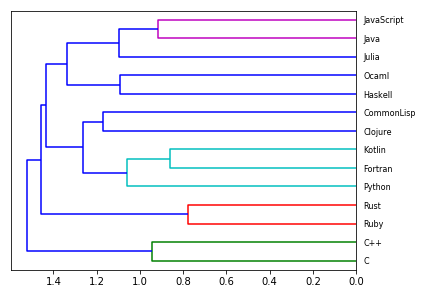

In [23]:
dendrogram(average, labels=names, orientation="left", leaf_font_size=8)
pylab.subplots_adjust(bottom=0.1, left=0.2, right=1.0, top=1.0)

In [27]:
s1 = fcns['Java']
s2 = fcns['JavaScript']
score = nw(s1, s2)


STRINGS
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
public static int multiply(int a, int b) { return a*b; }
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
function multiply(a, b) { 
  return a*b; 
}
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~


ALIGNMENT
'public static int multiply(int a, int b) {--- return a*b; -}'
'fu--nc----ti--on- multiply(----a,---- b) { \n  return a*b; \n}'


SCORE
36/60
0.6


In [14]:

# d = read_BLOSUM50("BLOSUM50.txt")
# prepare_data()

scoring = scoring_matrix(organisms_table, d)
scoring_distance_matrix = scoring_distance_matrix(scoring)
average = linkage(scoring_distance_matrix, "average")
dendrogram(average, labels=names, orientation="left", leaf_font_size=8)

pylab.subplots_adjust(bottom=0.1, left=0.2, right=1.0, top=1.0)
pylab.savefig("dendro.jpg")

NameError: name 'organisms_table' is not defined

In [10]:
# Create an empty matrix
def create_matrix(m, n):
    return [[0]*n for _ in xrange(m)]
 
# Calculate the scoring matrix between organisms
def scoring_matrix(table, blosum):
 
    scoring_matrix = create_matrix(len(organisms_table), len(organisms_table))
 
    i = 0
    for x in organisms_table:
        j = 0
        for y in organisms_table:
            M = needleman_wunsch(organisms[x][1], organisms[y][1], blosum, -5) 
            scoring_matrix[i][j] = M[-1][-1]
            j = j + 1
        i = i + 1
 
    return scoring_matrix

In [ ]:

# d = read_BLOSUM50("BLOSUM50.txt")
# prepare_data()

scoring = scoring_matrix(organisms_table, d)
scoring_distance_matrix = scoring_distance_matrix(scoring)
average = linkage(scoring_distance_matrix, "average")
dendrogram(average, labels=names, orientation="left", leaf_font_size=8)

pylab.subplots_adjust(bottom=0.1, left=0.2, right=1.0, top=1.0)
pylab.savefig("dendro.jpg")

In [13]:
# Calculate the distance scoring matrix
def scoring_distance_matrix(scoring_matrix):
 
    scoring_distance_matrix = create_matrix(len(scoring_matrix[0]), len(scoring_matrix[0]))
    maxR = get_matrix_max(scoring_matrix)
 
    for i in range(0, len(organisms_table)):
        for j in range(0, len(organisms_table)):
            scoring_distance_matrix[i][j] = abs(scoring_matrix[i][j] - maxR)
 
    return scoring_distance_matrix
 
# Return the max value in a matrix, used in 
# scoring_distance_matrix method
def get_matrix_max(matrix):
 
    max_value = None
 
    for i in range(0, len(matrix[0])):
        for j in range(0, len(matrix[0])):
            if(max_value == None):
                max_value = matrix[i][j]
            if(matrix[i][j] >= max_value):
                max_value = matrix[i][j]
 
    return max_value

## Plotting

In [16]:

d = read_BLOSUM50("BLOSUM50.txt")
prepare_data()
scoring = scoring_matrix(organisms_table, d)
scoring_distance_matrix = scoring_distance_matrix(scoring)
average = linkage(scoring_distance_matrix, "average")
dendrogram(average, labels=names, orientation="left", leaf_font_size=8)
pylab.subplots_adjust(bottom=0.1, left=0.2, right=1.0, top=1.0)
pylab.savefig("dendro.jpg")

NameError: name 'read_BLOSUM50' is not defined